# Heart Rate Variability 

In [1]:
import pandas as pd
import os

def load_ecg_data(directory_path):
    """Load ECG data from all txt files in a directory."""
    dataframes = []
    for file in os.listdir(directory_path):
        if file.endswith(".txt"):
            file_path = os.path.join(directory_path, file)
            try:
                data = pd.read_csv(file_path, sep="	",names=["beat", "ECG", "transformed_ecg", 'timestamp'], comment='#')
                # data.columns = ["beat", "ECG", "transformed_ecg"]
                dataframes.append(data)
            except:
                pass
    return dataframes

# Use the function to load data
ecg_data = load_ecg_data("C:/Users/fred/Desktop/hearts-signal/entrainment/data/250527/T8_sesion_ADR+IV_HEART")

ecg_data = [e for e in ecg_data if not e.empty]


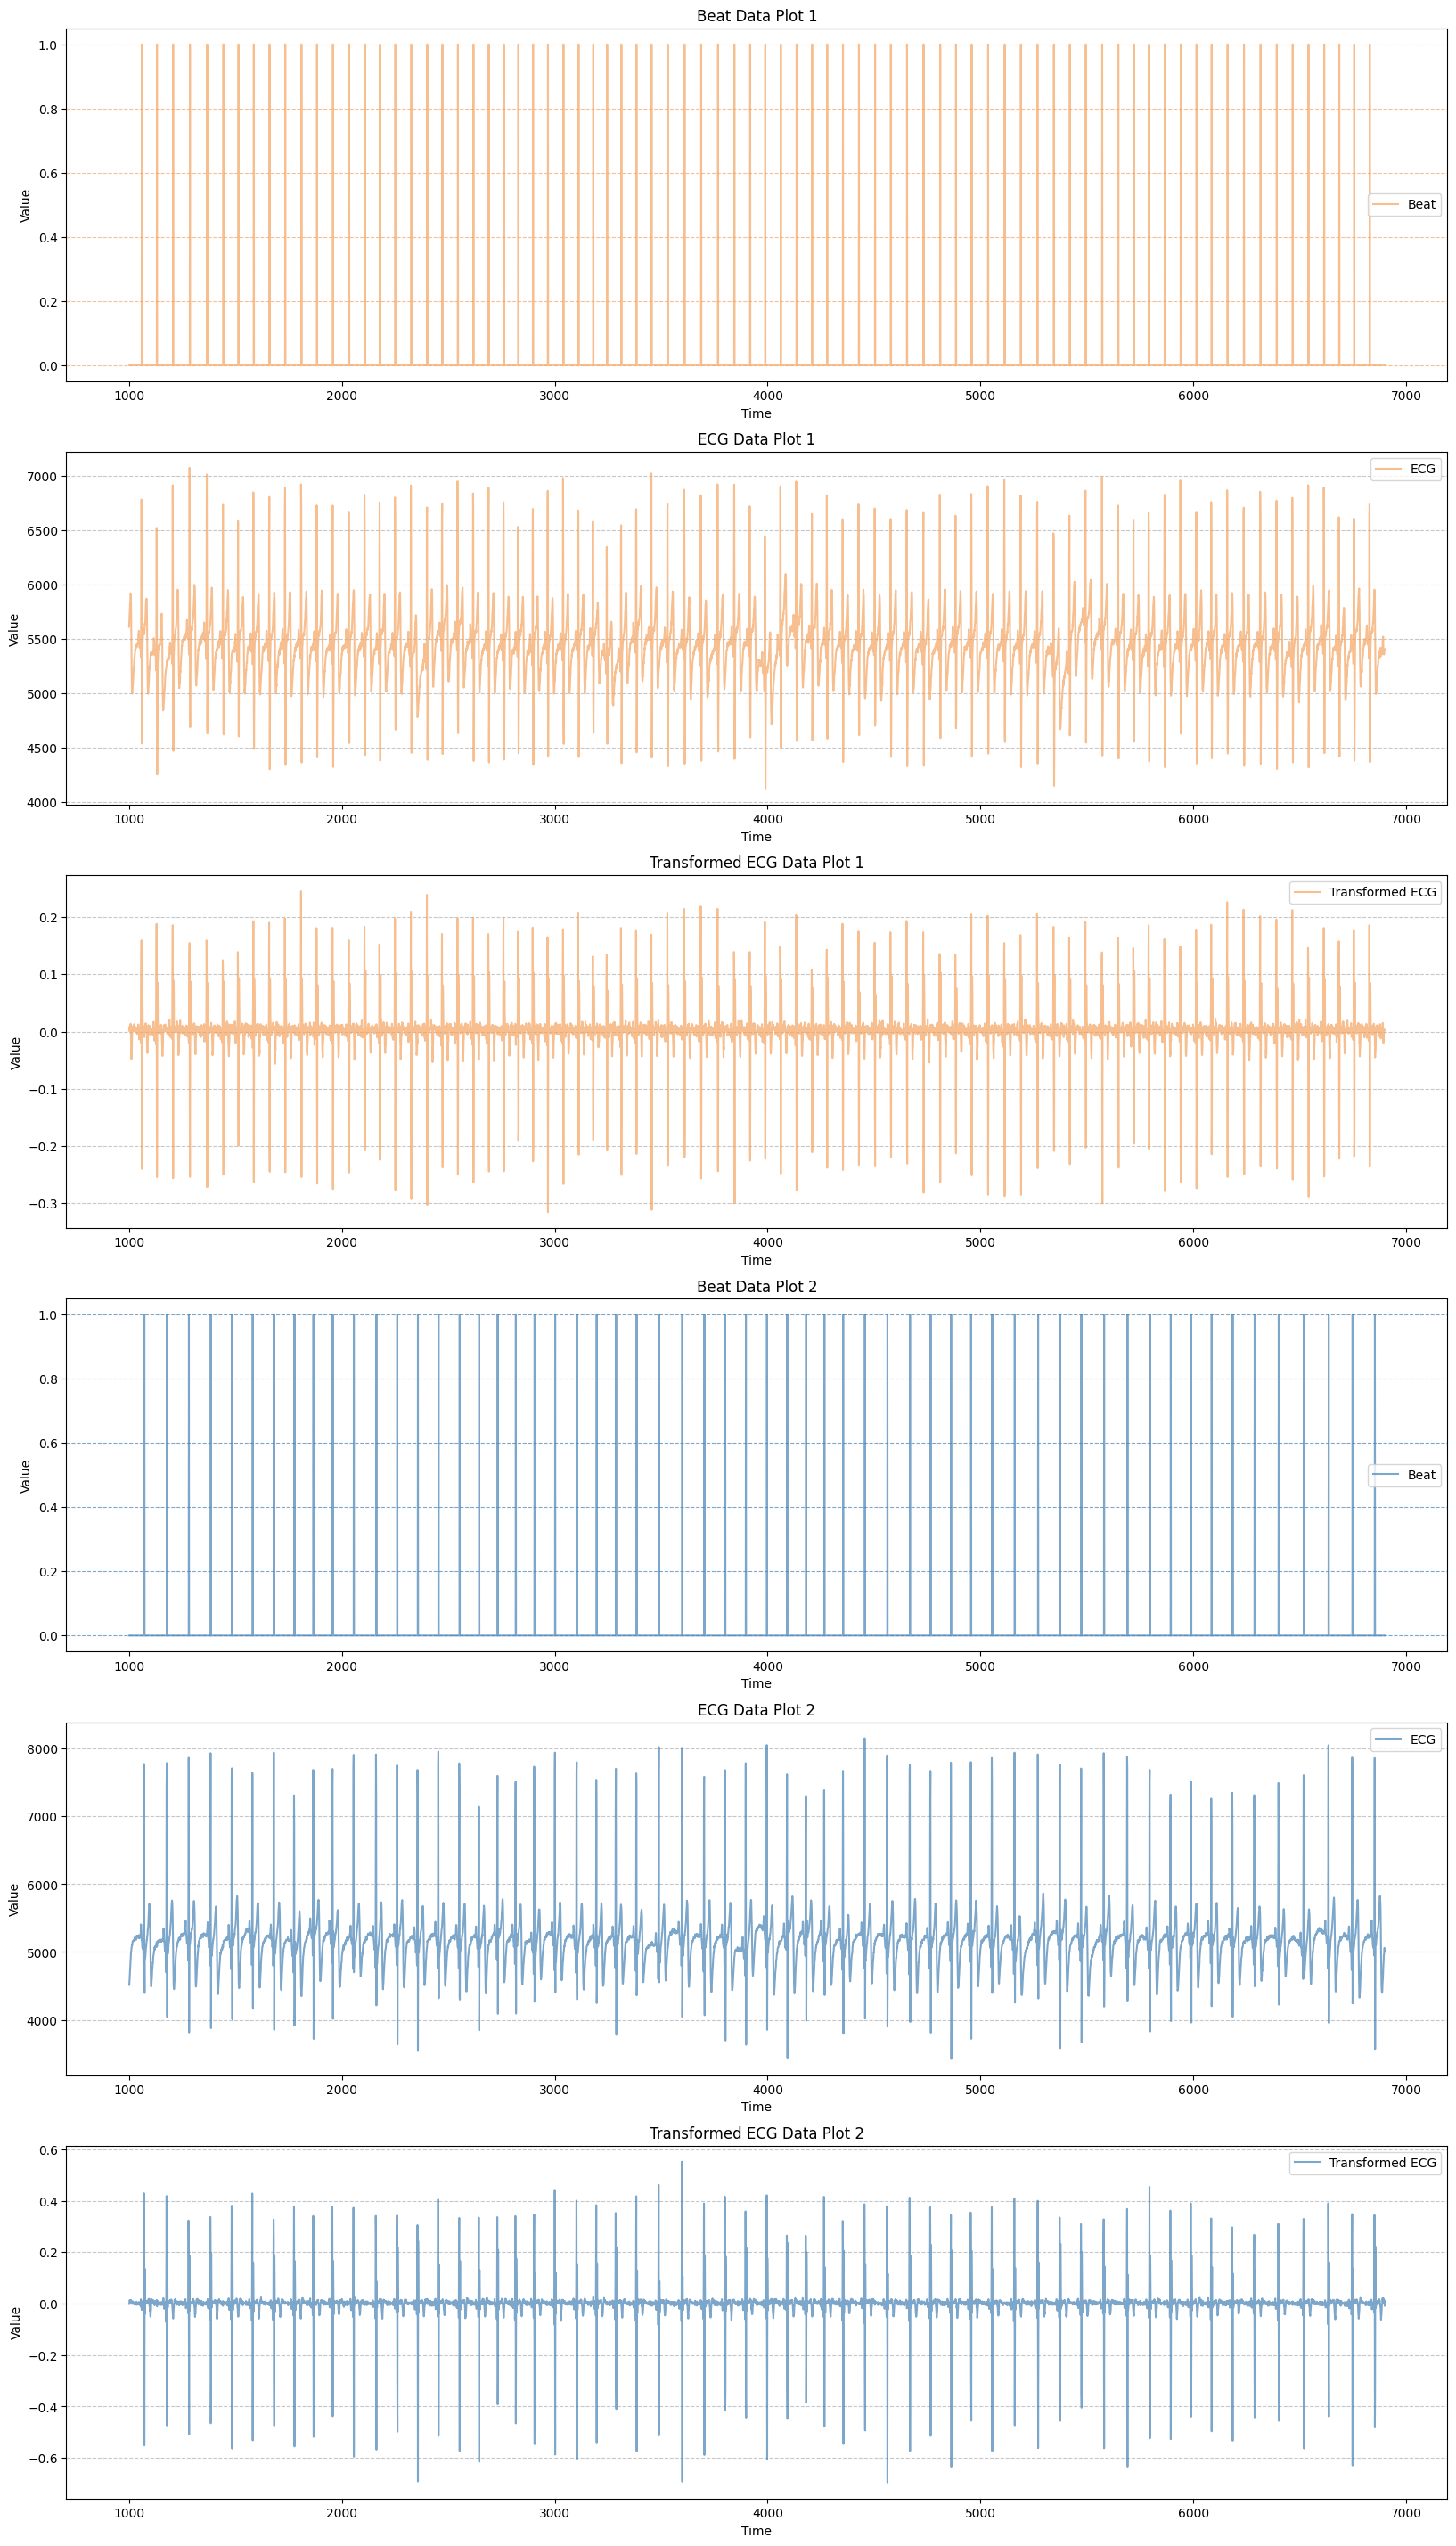

In [5]:
import matplotlib.pyplot as plt

def plot_ecg_data(ecg_data, start, stop):
    # Set dark background
    # plt.style.use('dark_background')

    # Create a figure and subplots
    fig, axs = plt.subplots(len(ecg_data)*3, figsize=(20,6*len(ecg_data)*3))

    colors = [ 'sandybrown', 'steelblue','goldenrod','olivedrab']

    # Iterate over all dataframes
    for i, df in enumerate(ecg_data):
        axs[i*3].plot(df['beat'][start:stop], alpha=0.7, color=colors[i], label='Beat')
        axs[i*3].set_title(f'Beat Data Plot {i+1}')
        axs[i*3].set_xlabel('Time')
        axs[i*3].set_ylabel('Value')
        axs[i*3].legend()
        axs[i*3].grid(axis='y', linestyle='--', color=colors[i], alpha=0.7)

        axs[i*3+1].plot(df['ECG'][start:stop], alpha=0.7, color=colors[i], label='ECG')
        axs[i*3+1].set_title(f'ECG Data Plot {i+1}')
        axs[i*3+1].set_xlabel('Time')
        axs[i*3+1].set_ylabel('Value')
        axs[i*3+1].legend()
        axs[i*3+1].grid(axis='y', linestyle='--', alpha=0.7)

        axs[i*3+2].plot(df['transformed_ecg'][start:stop], alpha=0.7, color=colors[i], label='Transformed ECG')
        axs[i*3+2].set_title(f'Transformed ECG Data Plot {i+1}')
        axs[i*3+2].set_xlabel('Time')
        axs[i*3+2].set_ylabel('Value')
        axs[i*3+2].legend()
        axs[i*3+2].grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot in a new window
    plt.show()

# Use the function to plot data
plot_ecg_data(ecg_data, start=1000, stop=6900)


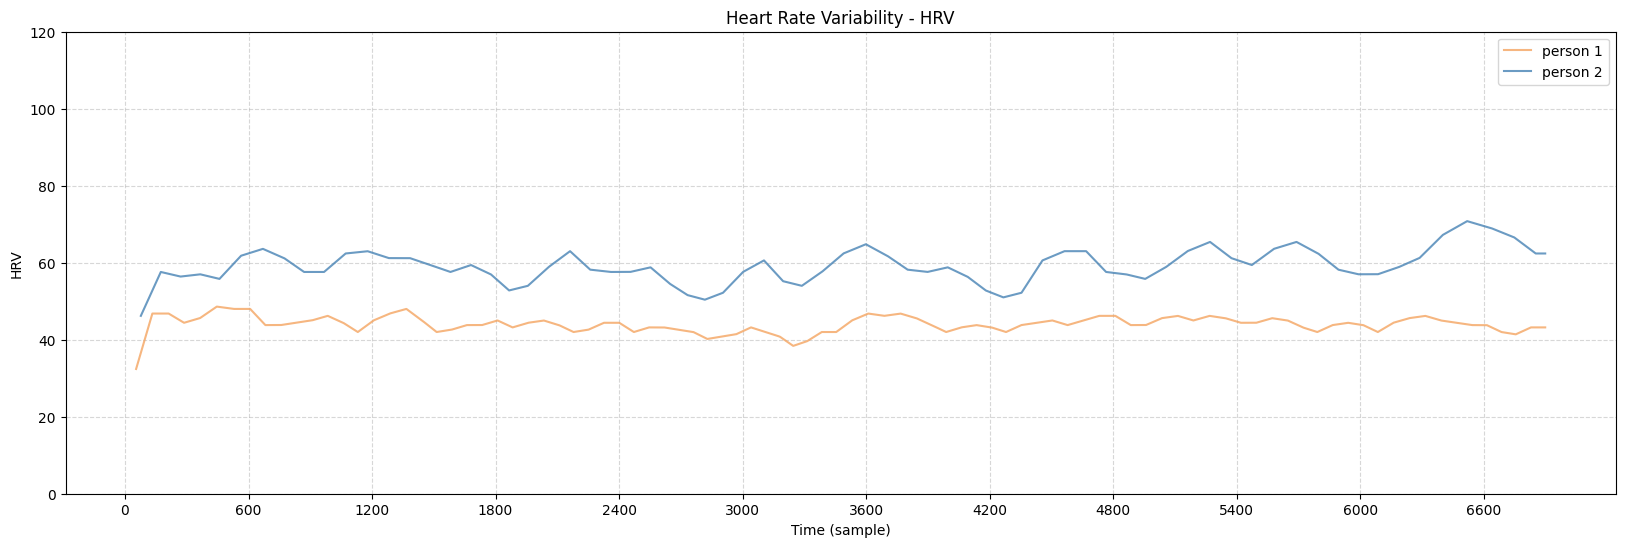

In [25]:
def calculate_hrv(ecg_data):
    # Iterate over all dataframes
    for df in ecg_data:

        if 'hrv' in df.columns:
            df.drop('hrv', axis=1, inplace=True)
        # Initialize a counter for 0 value readings
        zero_counter = 0
        # Initialize an empty list to store the counts of 0 value readings before each beat
        zero_counts = []

        # Iterate over the 'beat' column
        for beat in df['beat']:
            if beat == 0:
                # Increment the counter if the beat is 0
                zero_counter += 1
                zero_counts.append(None)
            elif beat == 1:
                # Convert the count of zeros to beats per minute (bpm)
                # We have 100 readings per second, so we multiply by 60 to get bpm
                bpm = (zero_counter * 60) / 100
                # Append the bpm to the list and reset the counter
                zero_counts.append(bpm)
                zero_counter = 0

        # Add hrv as a new column to the dataframe
        df['hrv'] = zero_counts
# Use the function to calculate the heart rate variability
calculate_hrv(ecg_data)

def plot_hrv_data(ecg_data, start, stop):
    # Create a figure and axes
    fig, axs = plt.subplots(figsize=(20, 6))

    colors = [ 'sandybrown', 'steelblue','goldenrod','olivedrab']

    # Iterate over all dataframes
    for i, df in enumerate(ecg_data):
        # Get the HRV values and corresponding indices
        hrv_values = df['hrv'][start:stop].interpolate()
        hrv_indices = hrv_values.index

        # Plot the HRV data as a continuous line
        axs.plot(hrv_indices, hrv_values, color=colors[i], alpha=0.8, label=f'person {i+1}')

    axs.set_title('Heart Rate Variability - HRV')
    axs.set_xlabel('Time (sample)')
    axs.set_ylabel('HRV')
    axs.set_ylim(0, 120)  # Set the y-axis range from 0 to 120
    axs.legend()
    axs.grid(axis='both', linestyle='--',  alpha=0.5)  # Add gridlines on both axes

    # Set x axis labels as multiples of 600
    x_ticks = range(start, stop + 1, 600)
    axs.set_xticks(x_ticks)

    # Show the plot in a new window
    plt.show()
# Use the function to plot HRV data
plot_hrv_data(ecg_data, 0, 6900)

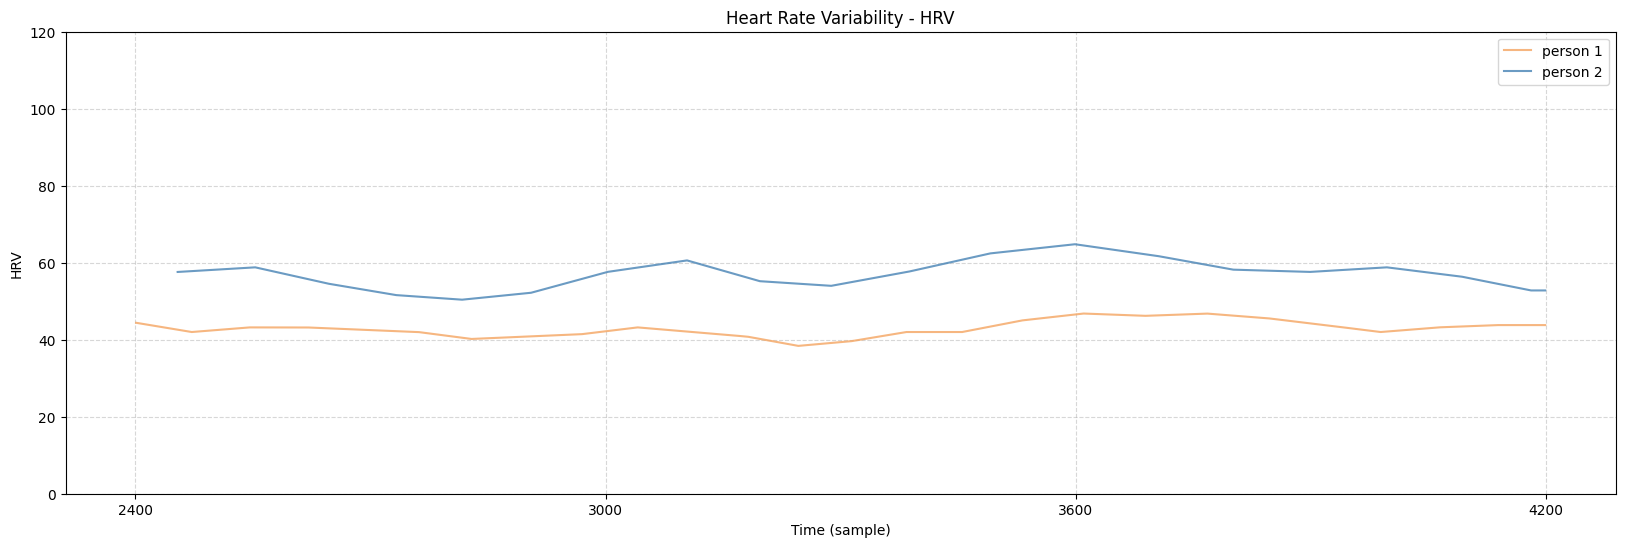

In [26]:
plot_hrv_data(ecg_data, 2400, 4200)

In [27]:
ecg_data

[       beat   ECG  transformed_ecg  timestamp  hrv
 0         0  5846         0.005061        NaN  NaN
 1         0  5920         0.013343        NaN  NaN
 2         0  5926         0.001079        NaN  NaN
 3         0  5964         0.006811        NaN  NaN
 4         0  5784        -0.032160        NaN  NaN
 ...     ...   ...              ...        ...  ...
 59995     0  5012        -0.022426        NaN  NaN
 59996     0  4972        -0.007203        NaN  NaN
 59997     0  4982         0.001819        NaN  NaN
 59998     0  4990         0.001458        NaN  NaN
 59999     0  5028         0.006900        NaN  NaN
 
 [60000 rows x 5 columns],
        beat   ECG  transformed_ecg  timestamp  hrv
 0         0  5304         0.008349        NaN  NaN
 1         0  5344         0.007590        NaN  NaN
 2         0  5394         0.009480        NaN  NaN
 3         0  5440         0.008712        NaN  NaN
 4         0  5460         0.003781        NaN  NaN
 ...     ...   ...              ...